# Store Sales

This Walmart Sales dataset is from Kaggle (https://www.kaggle.com/datasets/rutuspatel/retail-analysis-with-walmart-sales-data) as it includes the sales of 45 stores from Feb. 2010 to November 2012. There is also information on weekly sales, holidays, temperature, fuel price, consumer price index, and unemployment rate which can be valuable to find insights on performances. The objective of this project is to create an LSTM model to predict weekly sales.

## Exploratory Data Analysis

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.optimizers.legacy import Adam
import seaborn as sns

In [2]:
# Importing Dataset
data = pd.read_csv("WALMART_SALES_DATA.csv")

In [3]:
# Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


There are 6434 rows and 8 columns. Date is in the object form, whereas all of the rest of the columns are numerical.

In [4]:
# Set date column into DateTime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
# Set date column as index
data.set_index('Date', inplace=True)

In [5]:
# Descriptive Statistics
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


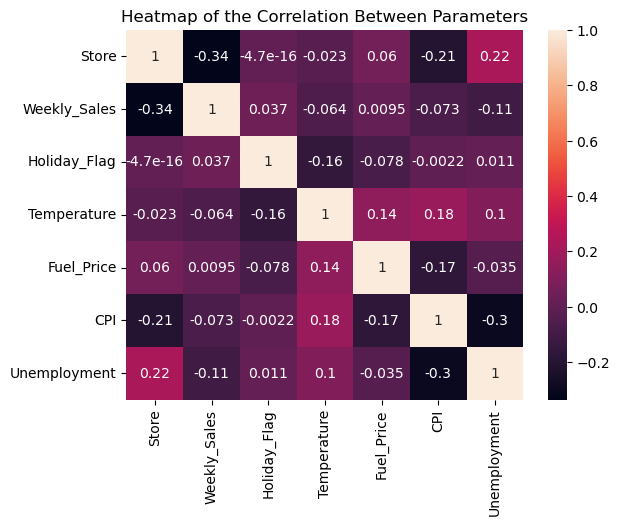

In [6]:
# Correlation between parameters (columns)
cor = data.corr()
# Plot Correlation on a Heatmap
sns.heatmap(cor, annot=True)
plt.title("Heatmap of the Correlation Between Parameters")
plt.show()

The parameters do not have a much correlation within each other. The consumer price index (CPI) is negative correlated with the unemployment index (-0.3) and the store (-0.21). the store index (Store) is positively correlated to unemployment (0.22), however, all of these correlations are relatively weak.

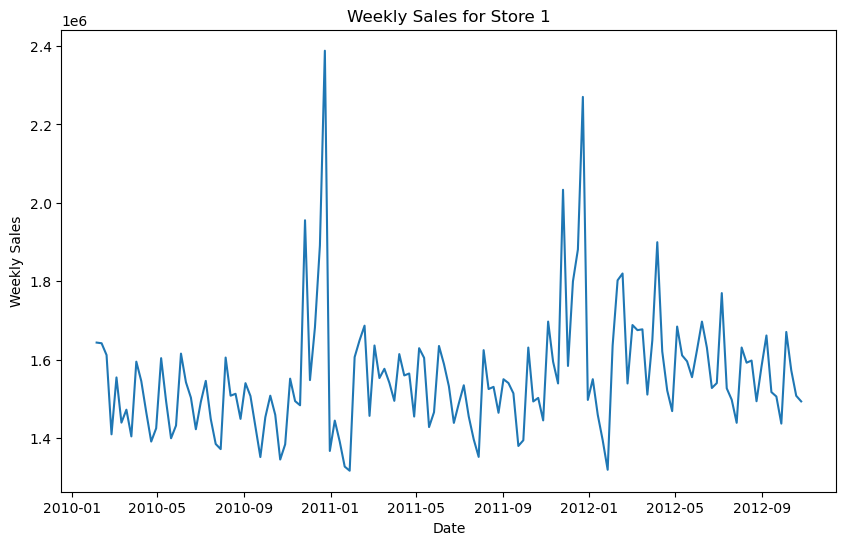

In [7]:
# Plotting the Weekly Sales for a specific Store
store_number = 1  # Replace with the desired store number
store_data = data[data['Store'] == store_number]
plt.figure(figsize=(10, 6))
plt.plot(store_data.index, store_data['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store {}'.format(store_number))
plt.show()

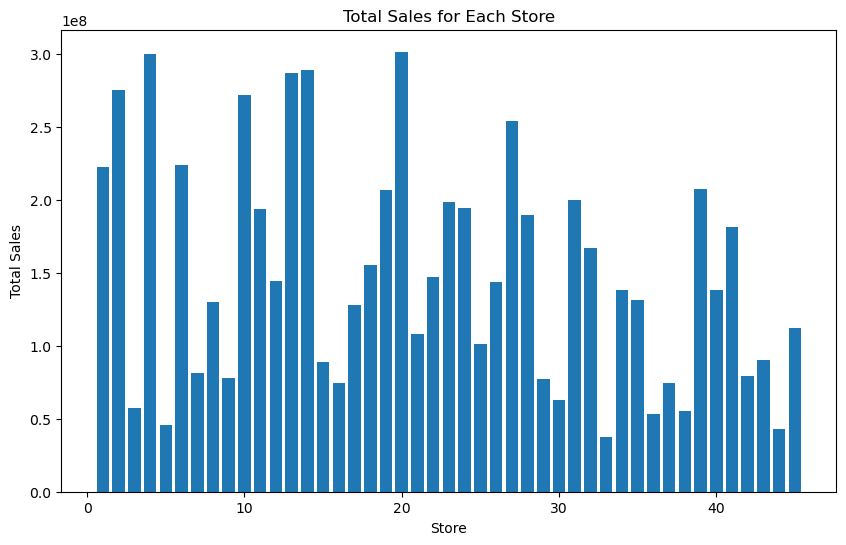

In [8]:
# Find Total Sales for each Store
total_sales = data.groupby('Store')['Weekly_Sales'].sum()

# Create a Bar Graph to Visualize Total Sales
plt.figure(figsize=(10, 6))
plt.bar(total_sales.index, total_sales.values)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Store')
plt.show()

## Feature Selection

In [9]:
# Seperate data for just a single store
store_data = data[data['Store'] == 1]

In [10]:
# Feature Selection
store_data = store_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]

In [11]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
store_data = scaler.fit_transform(store_data.values)

In [12]:
# Seperating dataset to Dependent & Independent Variables
X = store_data[:, :-1]
y = store_data[:, -1]

In [13]:
# Splitting Dataset into Training & Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Model Design

In [14]:
# Determine the number of features
n_features = X_train.shape[1]

# Reshape the input data for LSTM model
X_train = X_train.reshape((X_train.shape[0], 1, n_features))
X_test = X_test.reshape((X_test.shape[0], 1, n_features))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(1, n_features)))
# model.add(Dropout(0.5))
model.add(Dense(units=1))

# Set the desired learning rate
learning_rate = 0.001  

# Create the optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Metal device set to: Apple M1 Pro
Epoch 1/20
4/4 [==============================] - 1s 100ms/step - loss: 0.0638 - val_loss: 0.0354
Epoch 2/20
4/4 [==============================] - 0s 41ms/step - loss: 0.0538 - val_loss: 0.0251
Epoch 3/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0458 - val_loss: 0.0169
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0384 - val_loss: 0.0110
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0328 - val_loss: 0.0071
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0285 - val_loss: 0.0055
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0262 - val_loss: 0.0058
Epoch 8/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0246 - val_loss: 0.0071
Epoch 9/20
4/4 [==============================] - 0s 50ms/step - loss: 0.0247 - val_loss: 0.0085
Epoch 10/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0246 - val_loss: 0

## Model Performance

In [15]:
# Make predictions on test data
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 109ms/step


In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

1/1 [==============================] - 0s 13ms/step
Mean Squared Error (MSE): 0.006692900930518416
Mean Absolute Error (MAE): 0.06651440746906781


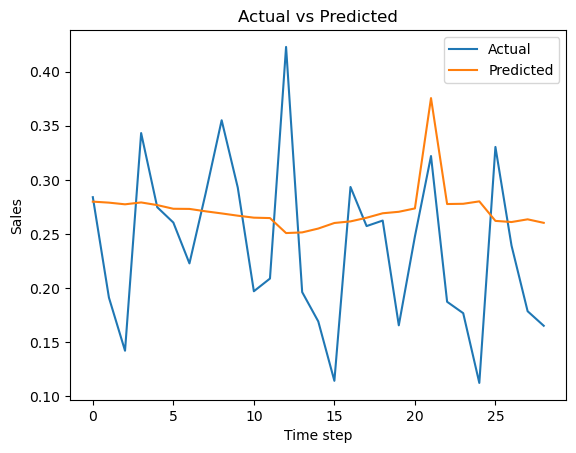

In [17]:
# Plot the actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time step')
plt.ylabel('Sales')
plt.legend()
plt.show()